# Example from La Palma
- This notebook shows how to convert the Raman-based FI densities from Dayton et al. (2023) into pressures and depths in the crust
- This assumes +-50K in entrapment temperature, and an error in CO$_2$ density of 0.002925
- Depth is calculated using a 2-step density profile, with 2.8 g/cm3 above the Moho, and 3.1 g/cm3 below

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

'0.0.48'

In [11]:
data=pd.read_excel('Dayton_et_al_2023_LaPalma_Example.xlsx',
                   sheet_name='4. MonteCarlo_Input')
data.head()

,Description,SAMPLE,FileName,Density (g/cm^3),Comment (EPMA Data Point),Na2O,MgO,SiO2,Al2O3,P2O5,K2O,CaO,TiO2,FeO,MnO,Cr2O3,NiO,Total,Fo
0,Monte Carlo input for Juptyer Notebook script,0,03 LM0 G1 FI1,0.875343,LM0_G1_RIM,0.009036,42.12351,39.90642,0.018331,0.000023,0.005965,0.213926,0.034901,17.91823,0.292019,0.078602,0.190220,100.7912,0.807341
1,NaN,0,06 LM0 G2 FI1,0.780430,LM0_G2_CENTER,0.009698,44.42279,39.70696,0.008494,0.000023,0.000412,0.322745,0.022287,15.26419,0.225410,0.018465,0.194827,100.1963,0.838388
2,NaN,0,17 LM0 G3 FI3,0.936785,LM0_G3_CENTER,0.011004,45.31343,40.64921,0.016474,0.000023,0.003951,0.241455,0.018161,14.36721,0.216594,0.065003,0.260763,101.1633,0.848989
3,NaN,0,11 LM0 G3 FI1 (CRR),0.928828,LM0_G3_CENTER,0.011004,45.31343,40.64921,0.016474,0.000023,0.003951,0.241455,0.018161,14.36721,0.216594,0.065003,0.260763,101.1633,0.848989
4,NaN,0,19 LM0 G3 FI4,0.928514,LM0_G3_CENTER,0.011004,45.31343,40.64921,0.016474,0.000023,0.003951,0.241455,0.018161,14.36721,0.216594,0.065003,0.260763,101.1633,0.848989


(array([ 1.,  5.,  8., 14., 16., 16., 26., 19., 12.,  3.]),
 array([0.73839514, 0.76266443, 0.78693373, 0.81120303, 0.83547233,
        0.85974163, 0.88401093, 0.90828023, 0.93254952, 0.95681882,
        0.98108812]),
 <BarContainer object of 10 artists>)

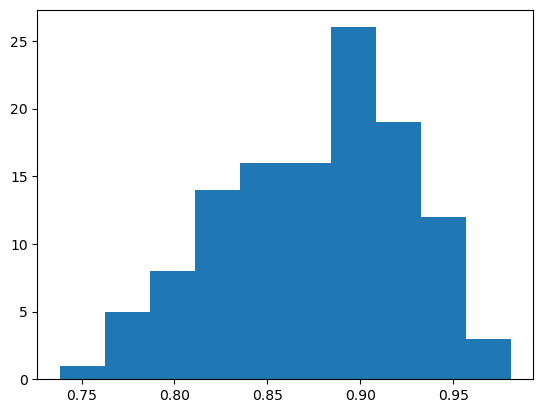

In [43]:
plt.hist(data['Density (g/cm^3)'])

working on sample number 0
working on sample number 20
working on sample number 40
working on sample number 60
working on sample number 80
working on sample number 100


,Filename,CO2_density_gcm3,SingleFI_D_km,SingleFI_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,Mean_MC_D_km,Med_MC_D_km,std_dev_MC_D_km,error_T_K,error_CO2_dens_gcm3,error_crust_dens_kgm3
0,03 LM0 G1 FI1,0.875343,21.140399,6.016987,6.020456,6.023347,0.217181,21.151806,21.161312,0.714152,50,0.002925,0.0
1,06 LM0 G2 FI1,0.780430,16.834446,4.707503,4.705985,4.708647,0.180246,16.829454,16.838206,0.592699,50,0.002925,0.0
2,17 LM0 G3 FI3,0.936785,24.412263,7.011993,7.007312,7.009662,0.251984,24.396871,24.404597,0.828596,50,0.002925,0.0
3,11 LM0 G3 FI1 (CRR),0.928828,23.965558,6.876146,6.870184,6.859158,0.246960,23.945955,23.909696,0.812075,50,0.002925,0.0
4,19 LM0 G3 FI4,0.928514,23.948123,6.870844,6.866273,6.873104,0.247455,23.933094,23.955555,0.813703,50,0.002925,0.0


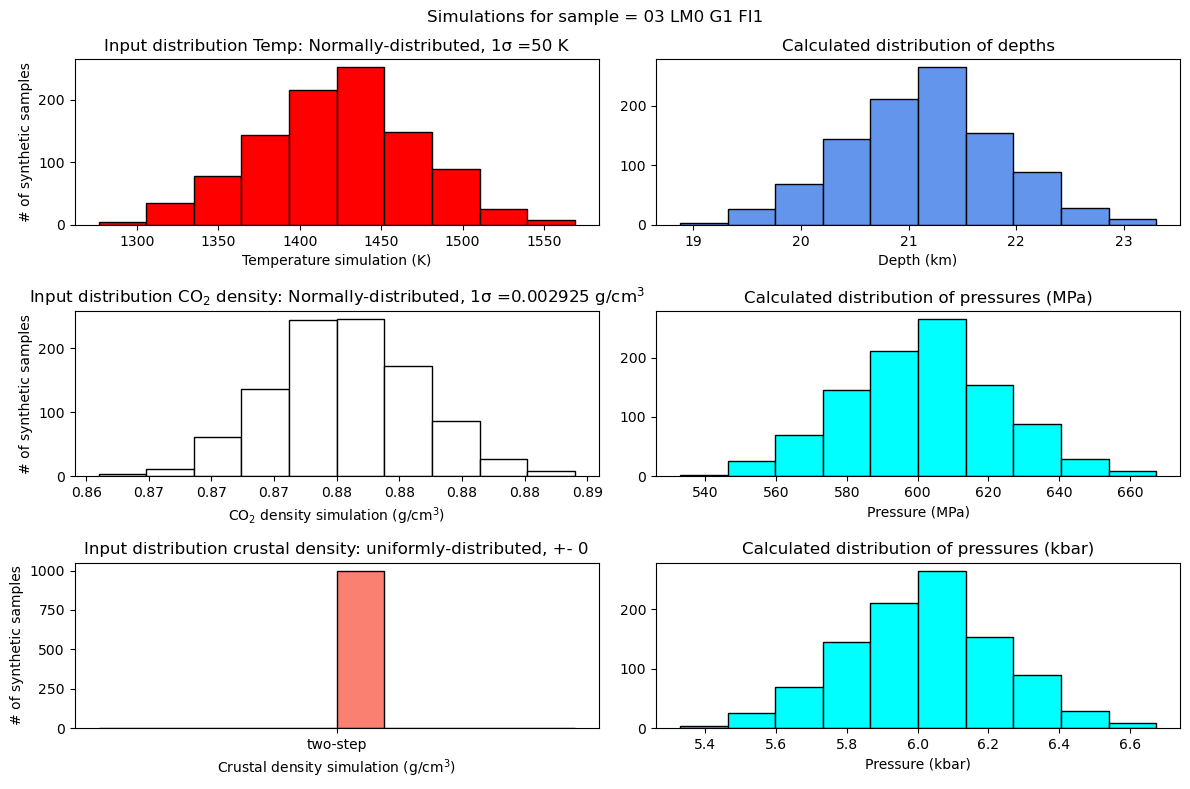

In [13]:
MC_Av_Tonly, MC_All_Tonly, fig=pf.loop_all_FI_MC(
T_K=1150+273.15,
error_T_K=50, 
error_type_T_K='Abs', 
error_dist_T_K='normal',
CO2_density_gcm3=data['Density (g/cm^3)'],
error_CO2_dens=0.002925, error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
sample_ID=data['FileName'],
crust_dens_kgm3='two-step', d1=14, rho1=2800, rho2=3100,
N_dup=1000, fig_i=0, plot_figure=True)
MC_Av_Tonly.head()

## Lets plot each FI depth and its error bar, colored by sample (as in Dayton et al. 2023)

(27.989937851435336, 13.83427988932576)

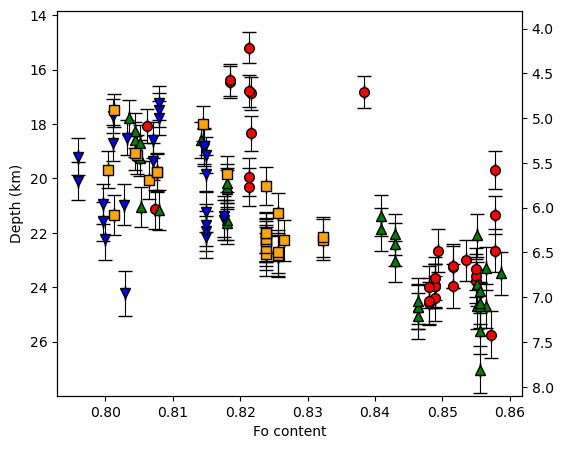

In [42]:
fig, (ax1) = plt.subplots(1, 1, figsize=(6,5))
         
sam0=data['SAMPLE']==0
sam1=data['SAMPLE']==2
sam4=data['SAMPLE']==4
sam6=data['SAMPLE']==6

ms=7
ax1.errorbar(data['Fo'].loc[sam0], 
             MC_Av_Tonly['SingleFI_D_km'].loc[sam0],
             xerr=0, yerr=MC_Av_Tonly['std_dev_MC_D_km'].loc[sam0],
             fmt='o', ecolor='k', elinewidth=0.8, mfc='red', ms=ms, mec='k', capsize=5)
ax1.errorbar(data['Fo'].loc[sam1], 
             MC_Av_Tonly['SingleFI_D_km'].loc[sam1],
             xerr=0, yerr=MC_Av_Tonly['std_dev_MC_D_km'].loc[sam1],
             fmt='^', ecolor='k', elinewidth=0.8, mfc='green', ms=ms, mec='k', capsize=5)

ax1.errorbar(data['Fo'].loc[sam4], 
             MC_Av_Tonly['SingleFI_D_km'].loc[sam4],
             xerr=0, yerr=MC_Av_Tonly['std_dev_MC_D_km'].loc[sam4],
             fmt='v', ecolor='k', elinewidth=0.8, mfc='blue', ms=ms, mec='k', capsize=5)
ax1.errorbar(data['Fo'].loc[sam6], 
             MC_Av_Tonly['SingleFI_D_km'].loc[sam6],
             xerr=0, yerr=MC_Av_Tonly['std_dev_MC_D_km'].loc[sam6],
             fmt='s', ecolor='k', elinewidth=0.8, mfc='orange', ms=ms, mec='k', capsize=5)
ax1.set_xlabel('Fo content')
ax1.set_ylabel('Depth (km)')
ax1.invert_yaxis()
ax2=ax1.twinx()
ax2.invert_yaxis()
Plim1=3.8
Plim2=8.1
ax2.set_ylim([Plim2, Plim1])
P_4kbar=pf.convert_pressure_depth_2step(P_kbar=Plim1, d1=14, rho1=2800, rho2=3100, g=9.81)
P_8kbar=pf.convert_pressure_depth_2step(P_kbar=Plim2, d1=14, rho1=2800, rho2=3100, g=9.81)
ax1.set_ylim([ P_8kbar, P_4kbar])

In [10]:
MC_Av_Tonly.to_clipboard(excel=True)